# Dealing with the missing values (Handling missing values)

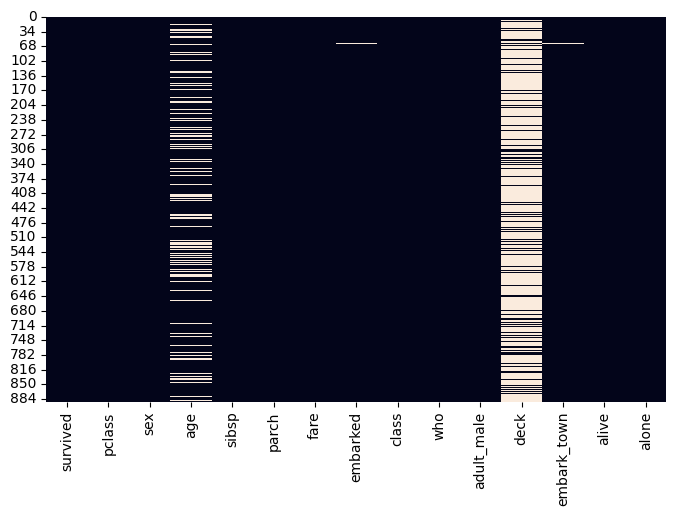

In [40]:

# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
# load the dataset
df= sns.load_dataset('titanic')
# visualize the missing values in the dataset
plt.figure(figsize=(8,5),num=1,facecolor='white',edgecolor='red')
sns.heatmap(df.isnull(),cbar=False,xticklabels=True)
plt.show()

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Handling missing values in titanic data 

In [5]:
# droping deck because of hihg missing values 
df_1=df.drop('deck', axis=1, inplace=True)


# using scikit learn for handling missing values 

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer=IterativeImputer(n_nearest_features=5,max_iter=20)
df['age']=imputer.fit_transform(df[['age']])
df.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

# filling missing values with foward and backward fillings

In [7]:
df['embark_town']=df[['embark_town']].ffill()
df['embarked']=df[['embarked']].bfill()
df.isnull().sum().sort_values(ascending=False)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df['age']=imputer.fit_transform(df[['age']])
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [9]:
# calculate the missing values
print(f"The number of missing values in each coloum:\n {df.isnull().sum().sort_values(ascending=False)}")
print("--------------------------------------------------")
# calculating the precentage of missing values
print(f"The precentage of missing values is:\n{df.isnull().sum().sort_values(ascending=False)/len(df)*100}")

The number of missing values in each coloum:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
--------------------------------------------------
The precentage of missing values is:
survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


## using missingno library to find missing values

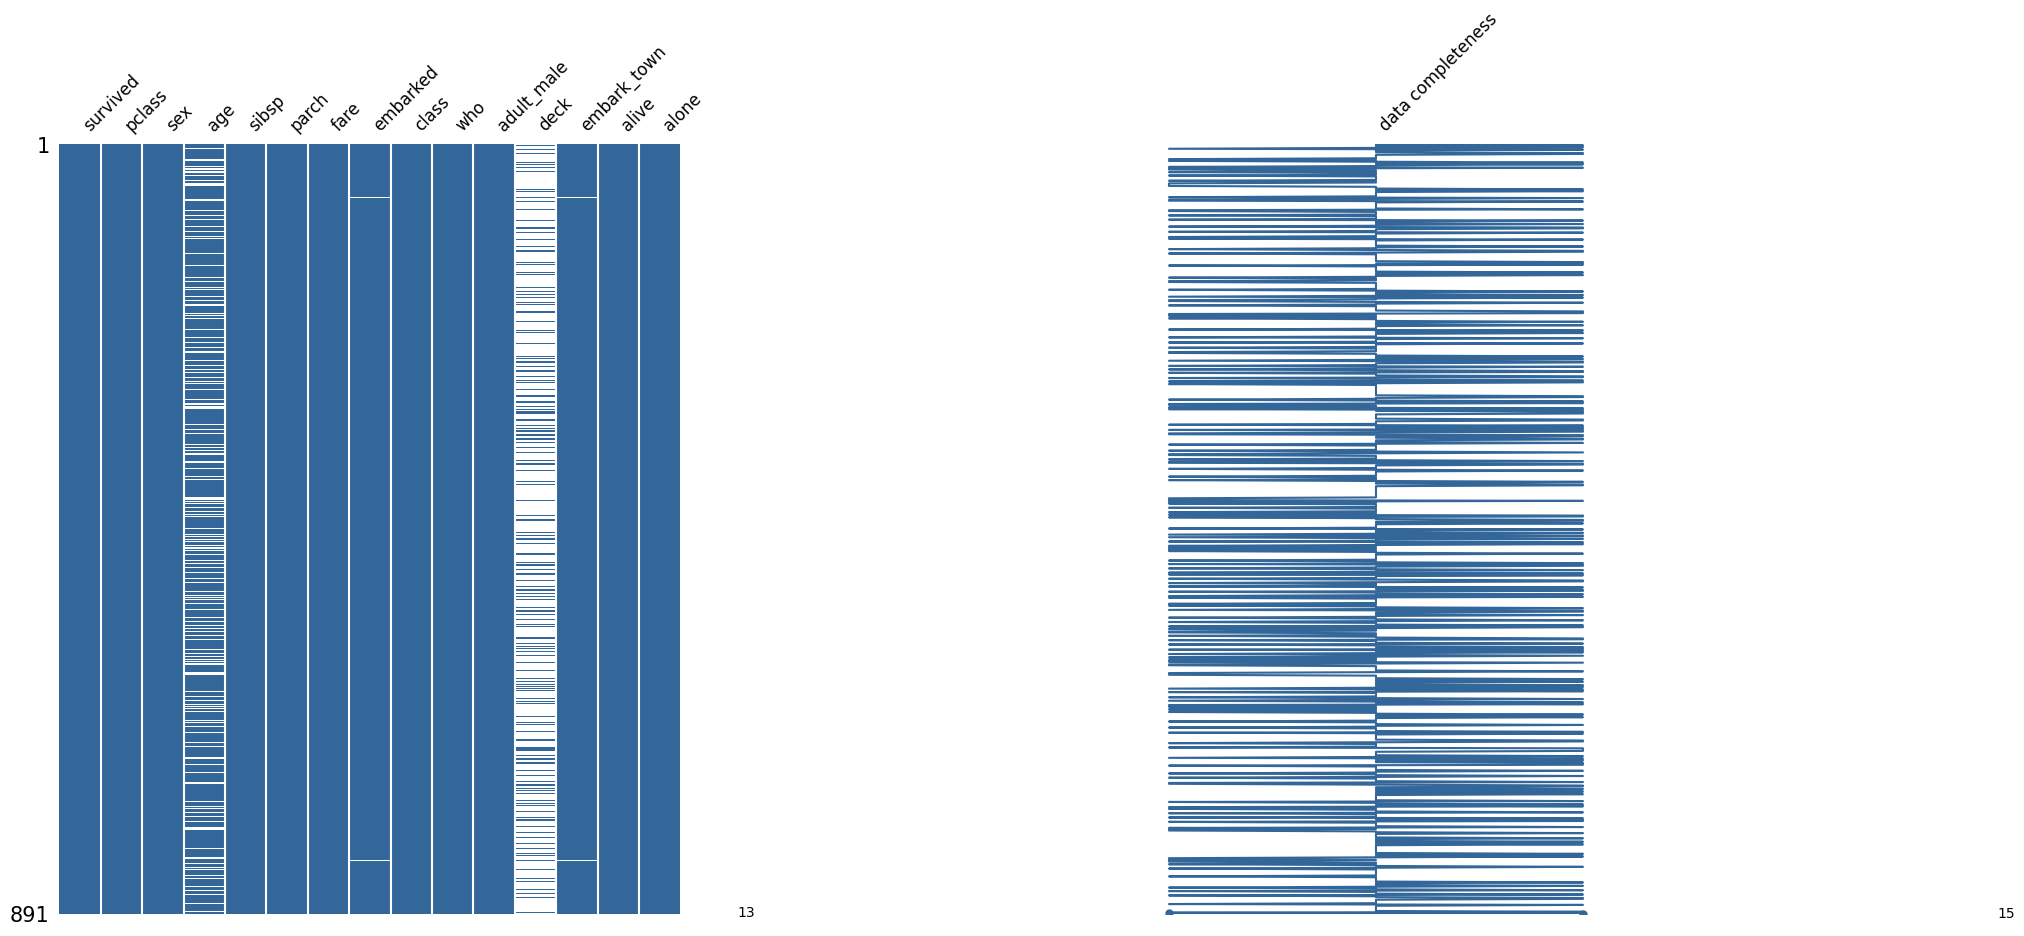

In [22]:
df1 =sns.load_dataset('titanic')
# using missingno library to indenmtify missing values.

import missingno as msno
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
msno.matrix(df1,filter='top', label_rotation=45,sparkline=True 
            ,labels=True, fontsize=12, width_ratios=[2, 4], color=(0.2, 0.4, 0.6))
plt.show()


# how to handle missing values

In [ ]:
import pandas as pd 
import numpy as np 
# creating a dataset
df=pd.DataFrame({'age':[20,21,22,23,24,25,26,27,28,29,np.nan,50]})
# taking mean of the data 
mean=df['age'].mean()
# filling missing value with mean
df_1=df['age'].fillna(mean)
print(f"Here is the data with missing values\n{df}")
print("--------------------------------------")
print(f"Here is the data without missing values\n{df_1}")

Here is the data with missing values
     age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
--------------------------------------
Here is the data without missing values
0     20.000000
1     21.000000
2     22.000000
3     23.000000
4     24.000000
5     25.000000
6     26.000000
7     27.000000
8     28.000000
9     29.000000
10    26.818182
11    50.000000
Name: age, dtype: float64


### filling missing values with median 2

In [ ]:
# create a dataframe
df=pd.DataFrame({"age":[20,21,22,23,24,25,26,27,28,29,np.nan,50]})

# first calculate median of data
median=df['age'].median()
df_2=df['age'].fillna(median)
print(f"Here is the data with missing values:\n{df}")
print("-----------------------------------")
print(f"Here is the data with median filled values:\n{df_2}")


Here is the data with missing values:
     age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
-----------------------------------
Here is the data with median filled values:
0     20.0
1     21.0
2     22.0
3     23.0
4     24.0
5     25.0
6     26.0
7     27.0
8     28.0
9     29.0
10    25.0
11    50.0
Name: age, dtype: float64


### 4 mode for filling 
this is used for categorical data only

In [ ]:
# creating a data with categorical data coloumn
df=pd.DataFrame({"Fruit":['Apple','Banana','Apple','banana','Apple',np.nan,'Banana','Apple']})
# find the  mode
mode=df['Fruit'].mode()[0]
# filling missing value with mode
df_3=df['Fruit'].fillna(mode)
print(f"Here is the data with missing value:\n{df}")
print("-----------------------------------")
print(f"Here is the data without missing values:\n{df_3}")

Here is the data with missing value:
    Fruit
0   Apple
1  Banana
2   Apple
3  banana
4   Apple
5     NaN
6  Banana
7   Apple
-----------------------------------
Here is the data without missing values:
0     Apple
1    Banana
2     Apple
3    banana
4     Apple
5     Apple
6    Banana
7     Apple
Name: Fruit, dtype: object


### Filling missing values with forward and backward fill
filling the data with previous and forward value

In [ ]:
# creating a  dataframe
df=pd.DataFrame({'age':[20,21,22,23,24,25,26,27,28,29,np.nan,50]})
print(f"Here is the data with missing values:\n{df}")
df_4=df['age'].ffill()
print("-------------------------")
print(f"Here is the data forward fill values:\n{df_4}")
print("----------------------")
df_5=df['age'].bfill()
print(f"Here is the data with backward fill:\n{df_5}")

Here is the data with missing values:
     age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
-------------------------
Here is the data without missing values:
0     20.0
1     21.0
2     22.0
3     23.0
4     24.0
5     25.0
6     26.0
7     27.0
8     28.0
9     29.0
10    29.0
11    50.0
Name: age, dtype: float64
----------------------
Here is the data with backward fill:
0     20.0
1     21.0
2     22.0
3     23.0
4     24.0
5     25.0
6     26.0
7     27.0
8     28.0
9     29.0
10    50.0
11    50.0
Name: age, dtype: float64


# KNN Imputation Ka Istemal: 

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.impute import KNNImputer
# creating a dataframe
data=pd.DataFrame({'age':[20,21,22,23,24,25,26,27,28,29,np.nan,50]})
# inintalize the KNN imputer
imputer=KNNImputer(n_neighbors=2)
# replace the missing values with KNNImputer
df_6=imputer.fit_transform(data[['age']])
print(f"Here is the data with missing values:\n{data}")
print("------------------------------")
print(f"Here is the data with imputed values:\n{df_6}")

Here is the data with missing values:
     age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
------------------------------
Here is the data with imputed values:
[[20.        ]
 [21.        ]
 [22.        ]
 [23.        ]
 [24.        ]
 [25.        ]
 [26.        ]
 [27.        ]
 [28.        ]
 [29.        ]
 [26.81818182]
 [50.        ]]


# Deep Learning Techniques Ka Istemal:

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# create a dataframe
df=pd.DataFrame({'age':[20,21,22,23,24,25,26,27,28,29,np.nan,50]})
# initalize the imputer
imputer=IterativeImputer()
# imputing the missing values
df_7=imputer.fit_transform(df[['age']])
print(f"Here is the data with missing values:\n{df}")
print("------------------------")
print(f"Here is the data without missing values:\n{df_7}")

Here is the data with missing values:
     age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
------------------------
Here is the data without missing values:
[[20.        ]
 [21.        ]
 [22.        ]
 [23.        ]
 [24.        ]
 [25.        ]
 [26.        ]
 [27.        ]
 [28.        ]
 [29.        ]
 [26.81818182]
 [50.        ]]


# simply delete kar da 

In [ ]:
# here we are going to delete null values
print(f"here is the data with missing values:\n{df}")
print("------------------------------")
df_8=df['age'].dropna().reset_index()
print(f"Here is the data withuot missing values:\n{df_8}")

here is the data with missing values:
     age
0   20.0
1   21.0
2   22.0
3   23.0
4   24.0
5   25.0
6   26.0
7   27.0
8   28.0
9   29.0
10   NaN
11  50.0
------------------------------
Here is the data withuot missing values:
    index   age
0       0  20.0
1       1  21.0
2       2  22.0
3       3  23.0
4       4  24.0
5       5  25.0
6       6  26.0
7       7  27.0
8       8  28.0
9       9  29.0
10     11  50.0


1- how to remove brakcets from an output\
2- how to delete one index form data after reseting index